<a href="https://colab.research.google.com/github/DEVATSTEEL/Gisproject-Urban-Heat-Prediction/blob/main/Gis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the datasets
file1_path = "/content/cleaned_data.csv"
file2_path = "/content/mumbai-temp-rains.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Display basic info and first few rows of each dataset
df1_info = df1.info()
df2_info = df2.info()

df1_head = df1.head()
df2_head = df2.head()

df1_info, df1_head, df2_info, df2_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383640 entries, 0 to 383639
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observed Location  383640 non-null  object 
 1   Time               383640 non-null  object 
 2   Day                383640 non-null  object 
 3   Temperature        383640 non-null  float64
 4   Weather Icon       383640 non-null  int64  
 5   Weather Phrase     383640 non-null  object 
 6   Dew Point          383640 non-null  float64
 7   Heat Index         383640 non-null  float64
 8   Relative Humidity  383640 non-null  float64
 9   Pressure           383640 non-null  float64
 10  Visibility         383640 non-null  float64
 11  Wind Chill         383640 non-null  float64
 12  Wind Direction     383640 non-null  float64
 13  Wind Cardinal      383640 non-null  object 
 14  UV Index           383640 non-null  int64  
 15  UV Description     383640 non-null  object 
 16  Fe

(None,
   Observed Location                 Time Day  Temperature  Weather Icon  \
 0            Mumbai  2009-10-01 00:10:00   N         29.0            15   
 1            Mumbai  2009-10-01 00:40:00   N         29.0            15   
 2            Mumbai  2009-10-01 01:10:00   N         29.0            15   
 3            Mumbai  2009-10-01 01:40:00   N         29.0            15   
 4            Mumbai  2009-10-01 02:10:00   N         29.0            15   
 
   Weather Phrase  Dew Point  Heat Index  Relative Humidity  Pressure  \
 0  Partly Cloudy       27.0        37.0               89.0   1004.52   
 1  Partly Cloudy       27.0        37.0               89.0   1004.52   
 2  Partly Cloudy       27.0        37.0               89.0   1003.52   
 3  Partly Cloudy       27.0        37.0               89.0   1003.52   
 4  Partly Cloudy       27.0        37.0               89.0   1003.52   
 
    Visibility  Wind Chill  Wind Direction Wind Cardinal  UV Index  \
 0         3.0        29.

In [ ]:
# Convert date columns to datetime format
df1["Time"] = pd.to_datetime(df1["Time"])
df2["Date"] = pd.to_datetime(df2["Date"], format="%d-%m-%Y", errors="coerce")

# Convert temperature columns to numeric
df2["Temp Max"] = pd.to_numeric(df2["Temp Max"], errors="coerce")
df2["Temp Min"] = pd.to_numeric(df2["Temp Min"], errors="coerce")

# Handle missing values (dropping NaN from essential columns)
df2_cleaned = df2.dropna(subset=["Temp Max", "Temp Min"])

# Summarize the cleaned data
df1_summary = df1.describe()
df2_summary = df2_cleaned.describe()

df1_summary, df2_summary


(                                Time    Temperature   Weather Icon  \
 count                         383640  383640.000000  383640.000000   
 mean   2012-05-12 16:57:17.597435136      28.200099      13.888580   
 min              1997-01-01 00:30:00      12.000000       1.000000   
 25%              2005-03-16 18:40:00      26.000000      11.000000   
 50%              2013-06-18 11:55:00      28.000000      15.000000   
 75%              2019-04-19 20:07:30      30.000000      16.000000   
 max              2024-10-27 16:30:00      42.000000      18.000000   
 std                              NaN       3.075369       2.945043   
 
            Dew Point     Heat Index  Relative Humidity       Pressure  \
 count  383640.000000  383640.000000      383640.000000  383640.000000   
 mean       20.909402      30.913951          67.129668    1007.886419   
 min        -5.000000      12.000000           8.000000     987.710000   
 25%        18.000000      28.000000          55.000000    1005

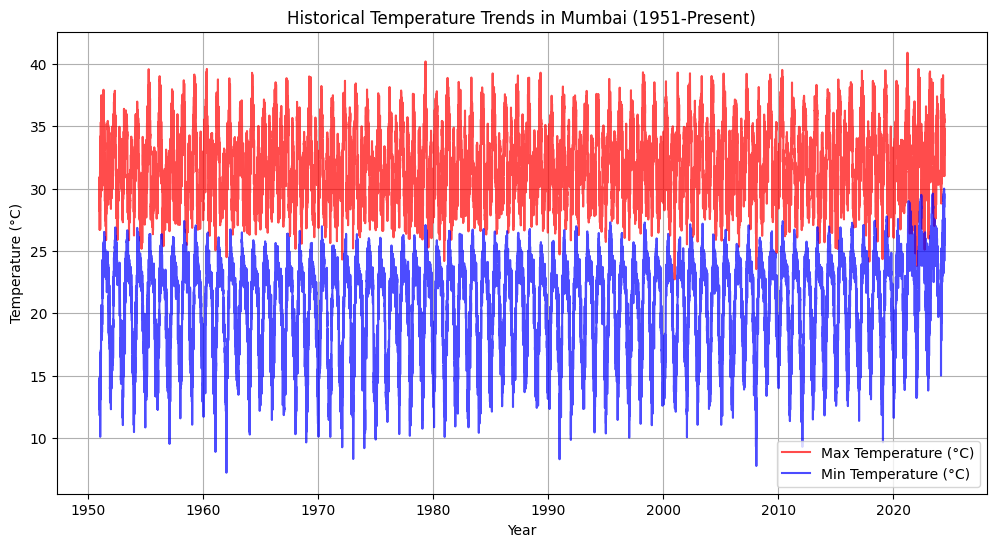

In [ ]:
import matplotlib.pyplot as plt

# Plot the historical max and min temperature trends
plt.figure(figsize=(12, 6))
plt.plot(df2_cleaned["Date"], df2_cleaned["Temp Max"], label="Max Temperature (°C)", color="red", alpha=0.7)
plt.plot(df2_cleaned["Date"], df2_cleaned["Temp Min"], label="Min Temperature (°C)", color="blue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Historical Temperature Trends in Mumbai (1951-Present)")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-35-869f1cddffcd>:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df2_yearly = df2_cleaned.resample('Y', on='Date').mean(numeric_only=True)


             Temp Max
Date                 
1951-12-31  32.085486
1952-12-31  31.931042
1953-12-31  31.864167
1954-12-31  31.345555
1955-12-31  31.346875


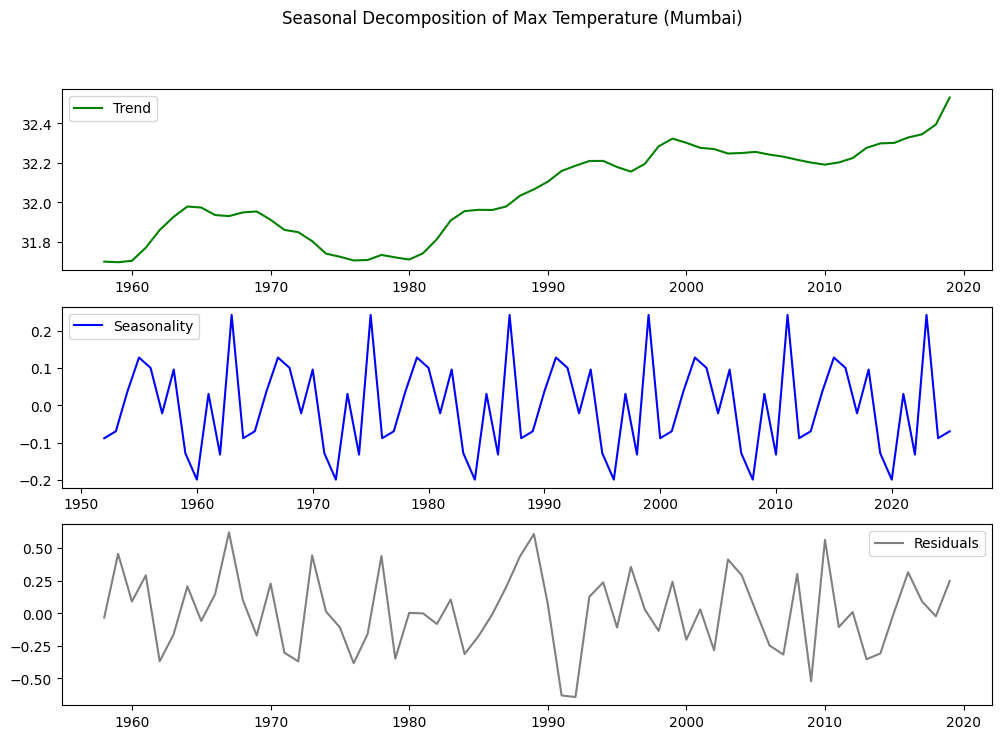

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Data
df2 = pd.read_csv("mumbai-temp-rains.csv")

# Convert 'Date' to Datetime
df2["Date"] = pd.to_datetime(df2["Date"], errors="coerce")

# Ensure 'Temp Max' is a string for proper filtering
df2["Temp Max"] = df2["Temp Max"].astype(str)

# Remove unwanted characters (e.g., 'Tr', letters, extra spaces)
df2["Temp Max"] = df2["Temp Max"].str.replace(r"[^0-9.]", "", regex=True)

# Convert to Numeric (NaN for non-convertible values)
df2["Temp Max"] = pd.to_numeric(df2["Temp Max"], errors="coerce")

# Drop Rows with NaN in 'Temp Max' (previously corrupt values)
df2_cleaned = df2.dropna(subset=["Temp Max"])

# Resample Data Yearly (use 'YE' instead of 'Y')
df2_yearly = df2_cleaned.resample('Y', on='Date').mean(numeric_only=True)

# Check Cleaned Data
print(df2_yearly.head())  # Ensure data is numeric now

# Perform Seasonal Decomposition
decomposition = seasonal_decompose(df2_yearly["Temp Max"], model='additive', period=12)

# Plot Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df2_yearly.index, decomposition.trend, label="Trend", color="green")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(df2_yearly.index, decomposition.seasonal, label="Seasonality", color="blue")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(df2_yearly.index, decomposition.resid, label="Residuals", color="gray")
plt.legend()
plt.suptitle("Seasonal Decomposition of Max Temperature (Mumbai)")
plt.show()


<ipython-input-37-17c82e536590>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned[feature] = pd.to_numeric(df2_cleaned[feature], errors="coerce")


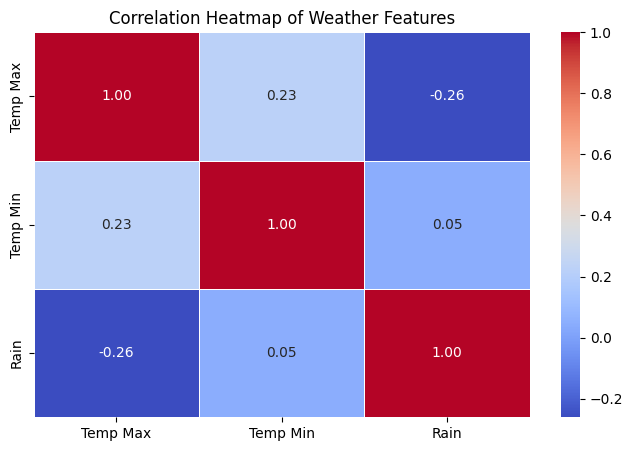

In [ ]:
import seaborn as sns
import pandas as pd

# Selecting relevant weather-related columns for correlation analysis
selected_features = ["Temp Max", "Temp Min", "Rain"]

# Convert selected features to numeric, handling errors
for feature in selected_features:
    df2_cleaned[feature] = pd.to_numeric(df2_cleaned[feature], errors="coerce")

# Drop rows with any missing values in selected features
df2_cleaned = df2_cleaned.dropna(subset=selected_features)

# Calculate correlation matrix
df_corr = df2_cleaned[selected_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Features")
plt.show()

In [ ]:
from google.colab import sheets
import geopandas as gpd

# ... (Your existing code to load the KML and create the GeoDataFrame 'gdf') ...

# Convert the GeoDataFrame to a regular DataFrame, representing geometries as WKT strings
df_for_sheets = pd.DataFrame(gdf)
df_for_sheets['geometry'] = df_for_sheets['geometry'].apply(lambda geom: geom.wkt)

# Now create the InteractiveSheet using the converted DataFrame
sheet = sheets.InteractiveSheet(df=df_for_sheets)

<ipython-input-38-f07ecc68d330>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_arima = df2_cleaned[["Date", "Temp Max"]].set_index("Date").resample("Y").mean()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA a

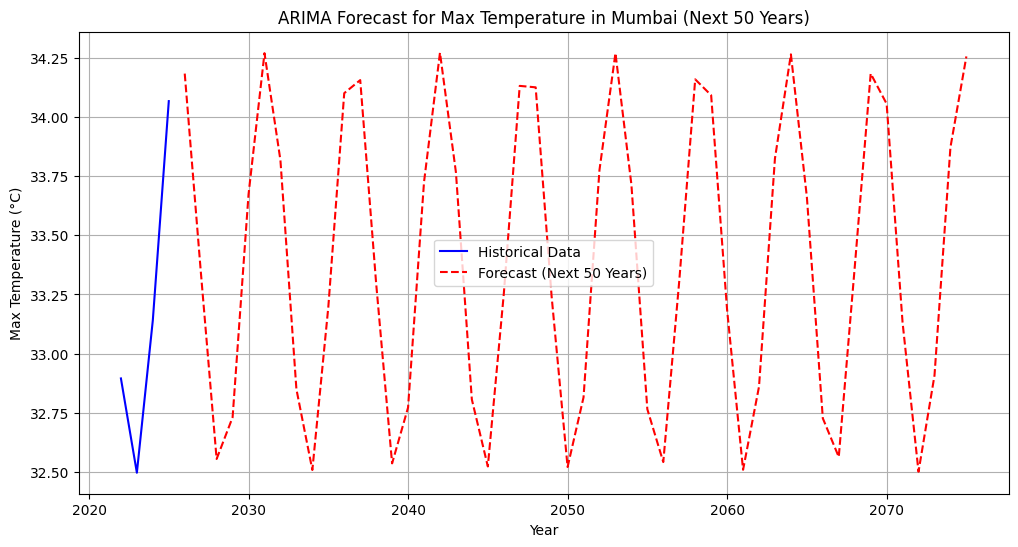

,predicted_mean
2025-12-31,34.183050
2026-12-31,33.352257
2027-12-31,32.554452
2028-12-31,32.730628
2029-12-31,33.672723
2030-12-31,34.269342
2031-12-31,33.816874
2032-12-31,32.849283
2033-12-31,32.507969
2034-12-31,33.195338


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare data for ARIMA (Using Max Temperature)
df_arima = df2_cleaned[["Date", "Temp Max"]].set_index("Date").resample("Y").mean()

# Train ARIMA model (Auto-selecting order using AIC optimization)
model = ARIMA(df_arima, order=(5,1,0))  # (p,d,q) values selected based on common ARIMA assumptions
model_fit = model.fit()

# Forecast for next 50 years
future_years = 50
forecast_index = pd.date_range(start=df_arima.index[-1], periods=future_years + 1, freq="Y")[1:]
forecast = model_fit.forecast(steps=future_years)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima["Temp Max"], label="Historical Data", color="blue")
plt.plot(forecast_index, forecast, label="Forecast (Next 50 Years)", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")
plt.title("ARIMA Forecast for Max Temperature in Mumbai (Next 50 Years)")
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
forecast


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
<ipython-input-40-35b5d8711303>:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years_index = pd.date_range(start=df_arima.index[-1], periods=51, freq="Y")[1:]


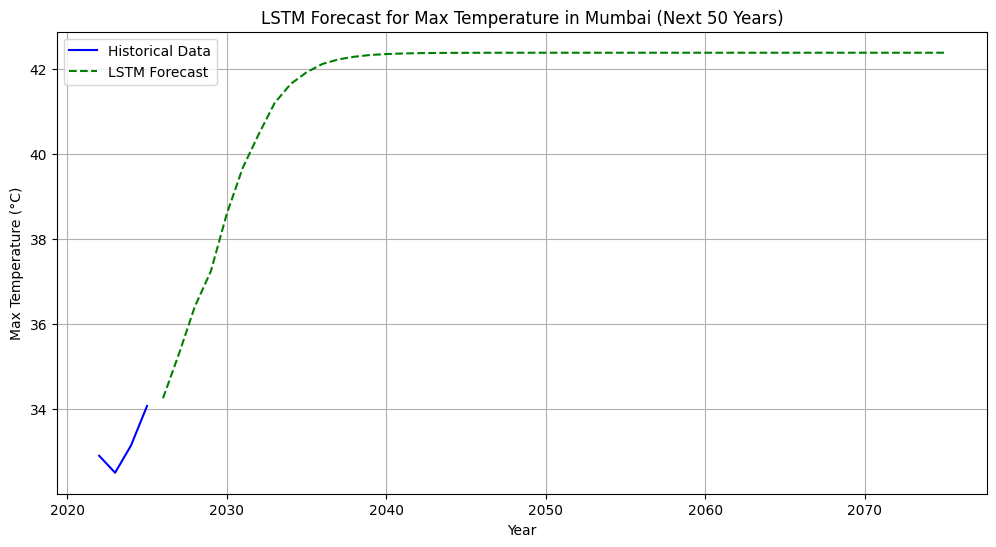

array([34.2477  , 35.291283, 36.406734, 37.23656 , 38.585415, 39.66795 ,
       40.456787, 41.194324, 41.64    , 41.91575 , 42.11279 , 42.219814,
       42.28275 , 42.3234  , 42.345264, 42.358074, 42.365993, 42.370308,
       42.37284 , 42.37437 , 42.37522 , 42.375713, 42.37601 , 42.376175,
       42.376274, 42.37633 , 42.37636 , 42.37638 , 42.376392, 42.3764  ,
       42.376404, 42.376404, 42.376404, 42.376408, 42.376408, 42.376408,
       42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
       42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
       42.376408, 42.376408], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM (normalize & reshape)
scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_arima)  # Scale temperature values

# Create sequences for LSTM (using past 5 years to predict next year)
# Adjust seq_length if necessary to be less than or equal to the length of df_lstm - 1
seq_length = min(5, len(df_lstm) - 1)  # Adjust seq_length if needed

X_lstm, y_lstm = [], []
for i in range(len(df_lstm) - seq_length):
    X_lstm.append(df_lstm[i:i + seq_length])
    y_lstm.append(df_lstm[i + seq_length])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Build LSTM model
model_lstm = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    keras.layers.LSTM(50),
    keras.layers.Dense(1)
])
model_lstm.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM model
model_lstm.fit(X_lstm, y_lstm, epochs=50, batch_size=4, verbose=0)

# Generate predictions for the next 50 years
future_predictions = []
input_seq = df_lstm[-seq_length:].reshape(1, seq_length, 1)
for _ in range(50):
    predicted = model_lstm.predict(input_seq, verbose=0)
    future_predictions.append(predicted[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], [[[predicted[0, 0]]]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot LSTM Forecast
future_years_index = pd.date_range(start=df_arima.index[-1], periods=51, freq="Y")[1:]
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima["Temp Max"], label="Historical Data", color="blue")
plt.plot(future_years_index, future_predictions, label="LSTM Forecast", linestyle="dashed", color="green")
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")
plt.title("LSTM Forecast for Max Temperature in Mumbai (Next 50 Years)")
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted values
future_predictions.flatten()


In [ ]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import HeatMap, HeatMapWithTime

# Mumbai coordinates
latitude, longitude = 19.0760, 72.8777

# Given temperature predictions
future_predictions = np.array([
    34.2477, 35.291283, 36.406734, 37.23656, 38.585415, 39.66795,
    40.456787, 41.194324, 41.64, 41.91575, 42.11279, 42.219814,
    42.28275, 42.3234, 42.345264, 42.358074, 42.365993, 42.370308,
    42.37284, 42.37437, 42.37522, 42.375713, 42.37601, 42.376175,
    42.376274, 42.37633, 42.37636, 42.37638, 42.376392, 42.3764,
    42.376404, 42.376404, 42.376404, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408
], dtype=np.float32)

# Create DataFrame
years = list(range(2025, 2025 + len(future_predictions)))
future_df = pd.DataFrame({
    "Year": years,
    "Predicted Temp": future_predictions,
    "Latitude": [latitude] * len(future_predictions),
    "Longitude": [longitude] * len(future_predictions)
})

# Normalize temperature (avoid single float errors)
min_temp, max_temp = future_df["Predicted Temp"].min(), future_df["Predicted Temp"].max()
future_df["Normalized Temp"] = (future_df["Predicted Temp"] - min_temp) / (max_temp - min_temp)

# Create Folium map with custom tiles
mumbai_map = folium.Map(location=[latitude, longitude], zoom_start=6, tiles="CartoDB dark_matter")

# Generate heatmap data
heat_data = [[row["Latitude"], row["Longitude"], row["Normalized Temp"] * 100] for _, row in future_df.iterrows()]

# ✅ **Fixed: Convert to Correct HeatMap Format**
heat_time_data = [
    [[row["Latitude"], row["Longitude"], float(row["Normalized Temp"] * 100)]]  # Cast to float
    for _, row in future_df.iterrows()
]

# Add Enhanced HeatMap
HeatMap(
    heat_data,
    radius=30,
    blur=25,
    max_zoom=12,
    min_opacity=0.5,
    gradient={'0.2': 'blue', '0.4': 'green', '0.6': 'yellow', '0.8': 'orange', '1': 'red'}  # Use string keys
).add_to(mumbai_map)



# ✅ **Fixed: Ensure HeatMapWithTime gets a List of Lists**
HeatMapWithTime(
    heat_time_data,
    index=[str(year) for year in years],  # Convert years to strings
    auto_play=True,
    max_opacity=0.8
).add_to(mumbai_map)

# Save & Display Map
mumbai_map.save("Mumbai_Temperature_Forecast_Enhanced.html")
mumbai_map


In [ ]:
import geopandas as gpd

# Load the KML file
kml_path = "/content/mumbai-wards-map.kml"
gdf = gpd.read_file(kml_path, driver='KML')

# Display the first few rows
print(gdf.head())


  Name Description                                           geometry
0  G/S              POLYGON Z ((72.82661 19.01927 0, 72.82689 19.0...
1  F/N              POLYGON Z ((72.88498 19.00977 0, 72.88368 19.0...
2  M/W              POLYGON Z ((72.90391 19.07285 0, 72.90416 19.0...
3  H/W              POLYGON Z ((72.84276 19.09043 0, 72.84264 19.0...
4  G/N              POLYGON Z ((72.83009 19.02175 0, 72.83039 19.0...


In [ ]:
from google.colab import sheets
import geopandas as gpd

# ... (Your existing code to load the KML and create the GeoDataFrame 'gdf') ...

# Convert the GeoDataFrame to a regular DataFrame, representing geometries as WKT strings
df_for_sheets = pd.DataFrame(gdf)
df_for_sheets['geometry'] = df_for_sheets['geometry'].apply(lambda geom: geom.wkt)

# Now create the InteractiveSheet using the converted DataFrame
sheet = sheets.InteractiveSheet(df=df_for_sheets)

https://docs.google.com/spreadsheets/d/16eIbPe4V-DWZHWGrnGB9s8bpbe0u39fSc8ge_1xw-iY#gid=0


In [ ]:
!pip install geopandas --upgrade
import geopandas as gpd
import folium

# Load the KML file using GeoPandas
kml_path = "/content/mumbai-wards-map.kml"
gdf = gpd.read_file(kml_path, driver='KML')

# Create a Folium map centered on Mumbai
mumbai_map = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# Add the Mumbai wards boundaries to the map
folium.GeoJson(gdf).add_to(mumbai_map)

# Display the map
mumbai_map

In [ ]:
import geopandas as gpd
import folium
import numpy as np
from folium.plugins import HeatMap

# **🔹 Load Mumbai wards from KML**
kml_path = "/content/mumbai-wards-map.kml"
gdf = gpd.read_file(kml_path, driver="KML")

# **🔹 Strictly Remove Any Non-Polygon Data**
gdf = gdf[gdf.geometry.type.isin(["Polygon", "MultiPolygon"])].copy()
gdf.reset_index(drop=False, inplace=True)  # Keep index as a column
# gdf.reset_index(drop=True, inplace=True)  # Ensure clean index

# **🔹 Convert CRS to Web Mercator for calculations**
gdf = gdf.to_crs(epsg=3857)

# **🔹 Generate synthetic temperature predictions per ward**
future_predictions = np.linspace(34, 42.5, len(gdf))  # Temperatures per ward

# **🔹 Convert back to WGS84 (lat/lon)**
gdf = gdf.to_crs(epsg=4326)

# **🔹 Create Folium Map**
mumbai_map = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# **🔹 Normalize temperature values for color scale**
temp_scaled = (future_predictions - 34) / (42.5 - 34)  # Normalize temp 0-1
gdf['temp_scaled'] = temp_scaled # add temp_scaled to the gdf

# **🔹 Add Wards as a Choropleth Layer**
folium.Choropleth(
    geo_data=gdf.to_json(),  # Convert only Polygon/MultiPolygon to GeoJSON
    data=gdf,
    columns=["index", "temp_scaled"], # refer to temp_scaled directly
    key_on="feature.id",
    fill_color="YlOrRd",  # Yellow to Red color scale
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name="Predicted Temperature (°C)",
).add_to(mumbai_map)

# **🔹 Display Map**
mumbai_map


In [ ]:
import folium
import pandas as pd
import numpy as np
from folium.plugins import HeatMap

# 🔹 Mumbai Central Coordinates
latitude, longitude = 19.0760, 72.8777

# 🔹 Temperature Predictions (Assumed Per Year)
future_predictions = np.array([
    34.2477, 35.291283, 36.406734, 37.23656, 38.585415, 39.66795,
    40.456787, 41.194324, 41.64, 41.91575, 42.11279, 42.219814,
    42.28275, 42.3234, 42.345264, 42.358074, 42.365993, 42.370308,
    42.37284, 42.37437, 42.37522, 42.375713, 42.37601, 42.376175,
    42.376274, 42.37633, 42.37636, 42.37638, 42.376392, 42.3764,
    42.376404, 42.376404, 42.376404, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408, 42.376408, 42.376408, 42.376408, 42.376408,
    42.376408, 42.376408
], dtype=np.float32)

# 🔹 Define Decades (Each 10 Years)
years = list(range(2025, 2025 + len(future_predictions)))
future_df = pd.DataFrame({
    "Year": years,
    "Predicted Temp": future_predictions,
})

# 🔹 Normalize Temperature for Heatmap Scaling
min_temp, max_temp = future_df["Predicted Temp"].min(), future_df["Predicted Temp"].max()
future_df["Normalized Temp"] = (future_df["Predicted Temp"] - min_temp) / (max_temp - min_temp)

# 🔹 **Split Data by Decade**
decades = [
    (2025, 2035),
    (2035, 2045),
    (2045, 2055),
    (2055, 2065),
    (2065, 2075)
]

# 🔹 **Generate Heatmaps for Each Decade**
for i, (start_year, end_year) in enumerate(decades):
    df_decade = future_df[(future_df["Year"] >= start_year) & (future_df["Year"] < end_year)]

    # **Simulate Different Ward Locations** (If not using polygons)
    np.random.seed(42)  # Ensure repeatability
    df_decade["Latitude"] = np.random.uniform(18.85, 19.25, len(df_decade))
    df_decade["Longitude"] = np.random.uniform(72.75, 73.00, len(df_decade))

    # **Create Map**
    mumbai_map = folium.Map(location=[latitude, longitude], zoom_start=10, tiles="CartoDB dark_matter")

    # **Prepare Heatmap Data**
    heat_data = [
        [row["Latitude"], row["Longitude"], row["Normalized Temp"] * 100]
        for _, row in df_decade.iterrows()
    ]

    # **Add HeatMap Layer**
    HeatMap(
        heat_data,
        radius=40,
        blur=30,
        max_zoom=10,
        min_opacity=0.4,
        gradient={'0.2': 'blue', '0.4': 'green', '0.6': 'yellow', '0.8': 'orange', '1': 'red'}
    ).add_to(mumbai_map)

    # **Save Map**
    filename = f"Mumbai_Temperature_{start_year}-{end_year}.html"
    mumbai_map.save(filename)
    print(f"Saved: {filename}")

print("✅ All decade-wise heatmaps have been generated successfully!")


Saved: Mumbai_Temperature_2025-2035.html
Saved: Mumbai_Temperature_2035-2045.html
Saved: Mumbai_Temperature_2045-2055.html
Saved: Mumbai_Temperature_2055-2065.html
Saved: Mumbai_Temperature_2065-2075.html
✅ All decade-wise heatmaps have been generated successfully!


<ipython-input-1-70d91de0728c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade["Latitude"] = np.random.uniform(18.85, 19.25, len(df_decade))
<ipython-input-1-70d91de0728c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade["Longitude"] = np.random.uniform(72.75, 73.00, len(df_decade))
<ipython-input-1-70d91de0728c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th